## Using merge_ordered()

#### Correlation between GDP and S&P500
In this exercise, you want to analyze stock returns from the S&P 500. You believe there may be a relationship between the returns of the S&P 500 and the GDP of the US. Merge the different datasets together to compute the correlation.

Two tables have been provided for you, named sp500, and gdp_usa. As always, pandas has been imported for you as pd.

In [1]:
import pandas as pd
sp500 = pd.read_csv("S&P500.csv")
gdp = pd.read_csv("WorldBank_GDP.csv")

In [2]:
common_columns = sp500.columns.intersection(gdp.columns) #learn common columns between two datasets
print(common_columns)

Index([], dtype='object')


So there is no same column name between two dataset tjerefore we need to look carefully these two datasets

In [3]:
gdp = gdp[["Country Code", "Year","GDP"]]
gdp_usa = gdp[gdp["Country Code"] == "USA"]
gdp_usa

,Country Code,Year,GDP
3,USA,2010,1.499210e+13
7,USA,2011,1.554260e+13
11,USA,2012,1.619700e+13
15,USA,2012,1.619700e+13
19,USA,2013,1.678480e+13
23,USA,2014,1.752170e+13
27,USA,2015,1.821930e+13
31,USA,2016,1.870720e+13
35,USA,2017,1.948540e+13
39,USA,2018,2.049410e+13


In [4]:
sp500

,Date,Returns
0,2008,-38.49
1,2009,23.45
2,2010,12.78
3,2011,0.00
4,2012,13.41
5,2014,11.39
6,2015,-0.73
7,2016,9.54
8,2017,19.42
9,2013,29.60


We've realised that there are columns which have different names but same logic in both datasets therefore we need to use <strong>left_on</strong> and <strong>right_on</strong> arguments in order to merge two datasets. In this section, we'll use <strong>merge_ordered</strong> method.

In [5]:
# Use merge_ordered() to merge gdp and sp500 on year and date
gdp_sp500 = pd.merge_ordered(gdp_usa, sp500, left_on="Year", right_on="Date", how="left")

# Print gdp_sp500
print(gdp_sp500)

  Country Code  Year           GDP    Date  Returns
0          USA  2010  1.499210e+13  2010.0    12.78
1          USA  2011  1.554260e+13  2011.0     0.00
2          USA  2012  1.619700e+13  2012.0    13.41
3          USA  2012  1.619700e+13  2012.0    13.41
4          USA  2013  1.678480e+13  2013.0    29.60
5          USA  2014  1.752170e+13  2014.0    11.39
6          USA  2015  1.821930e+13  2015.0    -0.73
7          USA  2016  1.870720e+13  2016.0     9.54
8          USA  2017  1.948540e+13  2017.0    19.42
9          USA  2018  2.049410e+13     NaN      NaN


In [6]:
# Use merge_ordered() to merge gdp and sp500, interpolate missing value
gdp_sp500 = pd.merge_ordered(gdp_usa, sp500, how= "left", left_on = "Year", right_on = "Date", fill_method = "ffill")

# Print gdp_sp500
print (gdp_sp500)

  Country Code  Year           GDP  Date  Returns
0          USA  2010  1.499210e+13  2010    12.78
1          USA  2011  1.554260e+13  2011     0.00
2          USA  2012  1.619700e+13  2012    13.41
3          USA  2012  1.619700e+13  2012    13.41
4          USA  2013  1.678480e+13  2013    29.60
5          USA  2014  1.752170e+13  2014    11.39
6          USA  2015  1.821930e+13  2015    -0.73
7          USA  2016  1.870720e+13  2016     9.54
8          USA  2017  1.948540e+13  2017    19.42
9          USA  2018  2.049410e+13  2017    19.42


In [7]:
# Subset the gdp and returns columns
gdp_returns = gdp_sp500[["GDP","Returns"]]

# Print gdp_returns correlation
print (gdp_returns.corr())

              GDP   Returns
GDP      1.000000  0.212173
Returns  0.212173  1.000000


#### Phillips curve using merge_ordered()
There is an economic theory developed by A. W. Phillips which states that inflation and unemployment have an inverse relationship. The theory claims that with economic growth comes inflation, which in turn should lead to more jobs and less unemployment.

You will take two tables of data from the U.S. Bureau of Labor Statistics, containing unemployment and inflation data over different periods, and create a Phillips curve. The tables have different frequencies. One table has a data entry every six months, while the other has a data entry every month. You will need to use the entries where you have data within both tables.

The tables unemployment and inflation have been loaded for you.

In [8]:
'''

# Use merge_ordered() to merge inflation, unemployment with inner join
inflation_unemploy = pd.merge_ordered(inflation, unemployment, on ="date", how = "inner")

# Print inflation_unemploy 
print(inflation_unemploy)

# Plot a scatter plot of unemployment_rate vs cpi of inflation_unemploy
inflation_unemploy.plot(x = "unemployment_rate", y = "cpi", kind = "scatter")
plt.show()

'''

'\n\n# Use merge_ordered() to merge inflation, unemployment with inner join\ninflation_unemploy = pd.merge_ordered(inflation, unemployment, on ="date", how = "inner")\n\n# Print inflation_unemploy \nprint(inflation_unemploy)\n\n# Plot a scatter plot of unemployment_rate vs cpi of inflation_unemploy\ninflation_unemploy.plot(x = "unemployment_rate", y = "cpi", kind = "scatter")\nplt.show()\n\n'

#### merge_ordered() caution, multiple columns
When using merge_ordered() to merge on multiple columns, the order is important when you combine it with the forward fill feature. The function sorts the merge on columns in the order provided. In this exercise, we will merge GDP and population data from the World Bank for the Australia and Sweden, reversing the order of the merge on columns. The frequency of the series are different, the GDP values are quarterly, and the population is yearly. Use the forward fill feature to fill in the missing data. Depending on the order provided, the fill forward will use unintended data to fill in the missing values.

The tables gdp and pop have been loaded.

In [9]:
gdp = pd.read_csv("WorldBank_GDP.csv")
pop = pd.read_csv("WorldBank_POP.csv")

In [10]:
'''
# Merge gdp and pop on date and country with fill and notice rows 2 and 3
ctry_date = pd.merge_ordered(gdp, pop, on =["date","country"],
                             fill_method='ffill')

# Print ctry_date
print(ctry_date)
'''

'\n# Merge gdp and pop on date and country with fill and notice rows 2 and 3\nctry_date = pd.merge_ordered(gdp, pop, on =["date","country"],\n                             fill_method=\'ffill\')\n\n# Print ctry_date\nprint(ctry_date)\n'

In [11]:
'''
# Merge gdp and pop on country and date with fill
date_ctry = pd.merge_ordered(gdp,pop,on = ["country", "date"],fill_method = "ffill") #reverse of above

# Print date_ctry
print(date_ctry)
'''

'\n# Merge gdp and pop on country and date with fill\ndate_ctry = pd.merge_ordered(gdp,pop,on = ["country", "date"],fill_method = "ffill") #reverse of above\n\n# Print date_ctry\nprint(date_ctry)\n'

## merge_asof() 

#### Using merge_asof() to study stocks
You have a feed of stock market prices that you record. You attempt to track the price every five minutes. Still, due to some network latency, the prices you record are roughly every 5 minutes. You pull your price logs for three banks, JP Morgan (JPM), Wells Fargo (WFC), and Bank Of America (BAC). You want to know how the price change of the two other banks compare to JP Morgan. Therefore, you will need to merge these three logs into one table. Afterward, you will use the pandas .diff() method to compute the price change over time. Finally, plot the price changes so you can review your analysis.

The three log files have been loaded for you as tables named jpm, wells, and bac.

In [12]:
'''
# Use merge_asof() to merge jpm and wells
jpm_wells = pd.merge_asof(jpm, wells, on = "date_time", direction = "nearest", suffixes = ("","_wells"))


# Use merge_asof() to merge jpm_wells and bac
jpm_wells_bac = pd.merge_asof(jpm_wells, bac, on = "date_time", direction = "nearest", suffixes = ("_jpm", "_bac"))


# Compute price diff
price_diffs = jpm_wells_bac.diff()


# Plot the price diff of the close of jpm, wells and bac only
price_diffs.plot(y=["close_jpm", "close_wells", "close_bac"])
plt.show()

'''

'\n# Use merge_asof() to merge jpm and wells\njpm_wells = pd.merge_asof(jpm, wells, on = "date_time", direction = "nearest", suffixes = ("","_wells"))\n\n\n# Use merge_asof() to merge jpm_wells and bac\njpm_wells_bac = pd.merge_asof(jpm_wells, bac, on = "date_time", direction = "nearest", suffixes = ("_jpm", "_bac"))\n\n\n# Compute price diff\nprice_diffs = jpm_wells_bac.diff()\n\n\n# Plot the price diff of the close of jpm, wells and bac only\nprice_diffs.plot(y=["close_jpm", "close_wells", "close_bac"])\nplt.show()\n\n'

#### Using merge_asof() to create dataset
The merge_asof() function can be used to create datasets where you have a table of start and stop dates, and you want to use them to create a flag in another table. You have been given gdp, which is a table of quarterly GDP values of the US during the 1980s. Additionally, the table recession has been given to you. It holds the starting date of every US recession since 1980, and the date when the recession was declared to be over. Use merge_asof() to merge the tables and create a status flag if a quarter was during a recession. Finally, to check your work, plot the data in a bar chart.

The tables gdp and recession have been loaded for you.

In [13]:
'''

'# Merge gdp and recession on date using merge_asof()
gdp_recession = pd.merge_asof(gdp, recession, on = "date")

# Create a list based on the row value of gdp_recession['econ_status']
is_recession = ['r' if s=='recession' else 'g' for s in gdp_recession['econ_status']]

# Plot a bar chart of gdp_recession
gdp_recession.plot(kind="bar", y="gdp", x="date", color=is_recession, rot=90)
plt.show()

'''

'\n\n\'# Merge gdp and recession on date using merge_asof()\ngdp_recession = pd.merge_asof(gdp, recession, on = "date")\n\n# Create a list based on the row value of gdp_recession[\'econ_status\']\nis_recession = [\'r\' if s==\'recession\' else \'g\' for s in gdp_recession[\'econ_status\']]\n\n# Plot a bar chart of gdp_recession\ngdp_recession.plot(kind="bar", y="gdp", x="date", color=is_recession, rot=90)\nplt.show()\n\n'

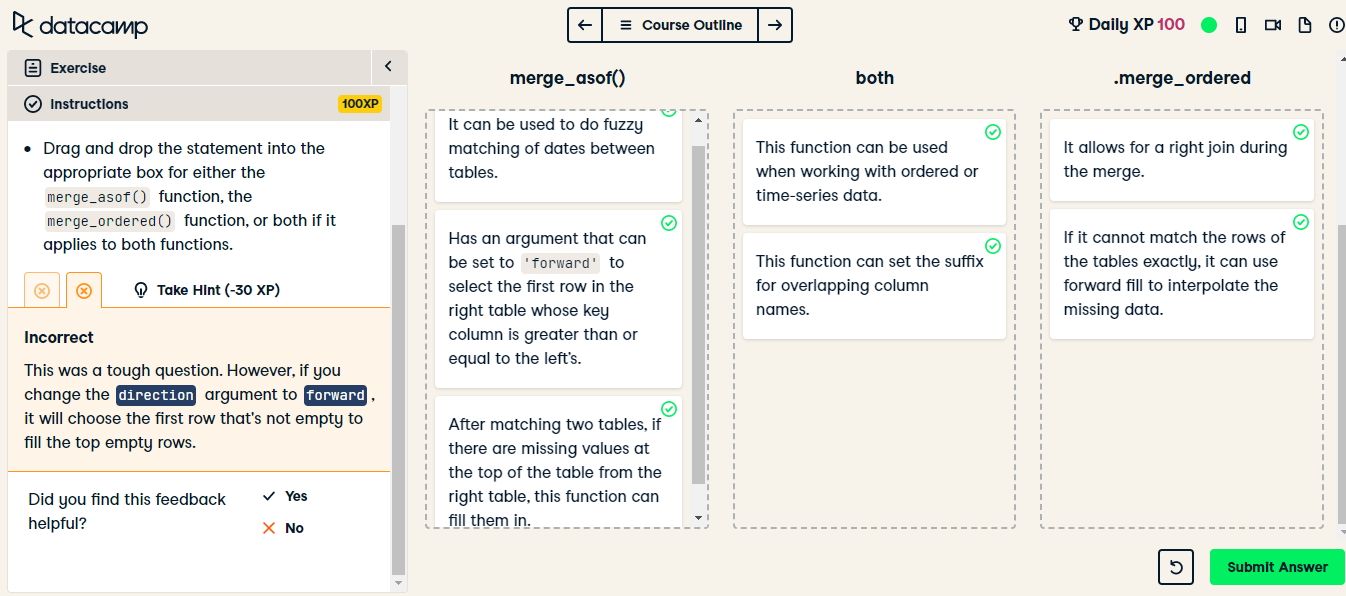<


## .query() method

#### Explore financials with .query()
You have been given a table of financial data from some popular social network companies called social_fin. All of the values are in thousands of US dollars.

Use the .query() method and the IPython shell to explore social_fin and select the True statement.

##### Possible Answers

a.There 2 rows where the value is greater than $50,000,000K.

b.There are 3 rows for total revenue for Facebook.

<strong> c.There are 6 rows where the net income has a negative value.</strong> 

d.There are 45 rows, where the gross profit is greater than $100K.

In [ ]:
'''
social_fin = pd.read_csv(".csv")
social_fin

'''

In [ ]:
#social_fin.query("value>50000000") a is checked, False

In [18]:
#social_fin.query('financial == "total_revenue" and company == "facebook" ') b is checked, False

In [19]:
#social_fin.query('financial == "net_income" and value < 0 ') c is checked, true

In [20]:
#social_fin.query('financial =="gross_profit" and value > 100000') d is checked, false

#### Subsetting rows with .query()
In this exercise, you will revisit GDP and population data for Australia and Sweden from the World Bank and expand on it using the .query() method. You'll merge the two tables and compute the GDP per capita. Afterwards, you'll use the .query() method to sub-select the rows and create a plot. Recall that you will need to merge on multiple columns in the proper order.

The tables gdp and pop have been loaded for you.

In [ ]:
'''
# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp, pop, on = ["country", "date"], fill_method = "ffill")

'''

In [ ]:
'''
# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp, pop, on=['country','date'], fill_method='ffill')

# Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
gdp_pop['gdp_per_capita'] = gdp_pop['gdp'] / gdp_pop['pop']

# Pivot data so gdp_per_capita, where index is date and columns is country
gdp_pivot = gdp_pop.pivot_table('gdp_per_capita', 'date', 'country')

# Select dates equal to or greater than 1991-01-01
recent_gdp_pop = gdp_pivot.query('date >= "1991-01-01"')

# Plot recent_gdp_pop
recent_gdp_pop.plot(rot=90)
plt.show()

'''

## Reshaping data with .melt()

#### Select the right .melt() arguments
You are given a table named inflation. Chose the option to get the same output as the table below.

   country    indicator  year  annual
0   Brazil  Inflation %  2017    3.45
1   Canada  Inflation %  2017    1.60
2   France  Inflation %  2017    1.03
3    India  Inflation %  2017    2.49
4   Brazil  Inflation %  2018    3.66
5   Canada  Inflation %  2018    2.27
6   France  Inflation %  2018    1.85
7    India  Inflation %  2018    4.86
8   Brazil  Inflation %  2019    3.73
9   Canada  Inflation %  2019    1.95
10  France  Inflation %  2019    1.11
11   India  Inflation %  2019    7.66



a.inflation.melt(id_vars=['country','indicator'], var_name='annual') 

b.inflation.melt(id_vars=['country'], var_name='indicator', value_name='annual')

<strong>c.inflation.melt(id_vars=['country','indicator'], var_name='year', value_name='annual')</strong>

d.inflation.melt(id_vars=['country'], var_name='year', value_name='annual')

#### Using .melt() to reshape government data
The US Bureau of Labor Statistics (BLS) often provides data series in an easy-to-read format - it has a separate column for each month, and each year is a different row. Unfortunately, this wide format makes it difficult to plot this information over time. In this exercise, you will reshape a table of US unemployment rate data from the BLS into a form you can plot using .melt(). You will need to add a date column to the table and sort by it to plot the data correctly.

The unemployment rate data has been loaded for you in a table called ur_wide. You are encouraged to view the table in the IPython shell before beginning the exercise.

In [ ]:
'''
# unpivot everything besides the year column
ur_tall = ur_wide.melt(id_vars=['year'], var_name='month', value_name='unempl_rate')


# Create a date column using the month and year columns of ur_tall
ur_tall['date'] = pd.to_datetime(ur_tall['year'] + '-' + ur_tall['month'])

# Sort ur_tall by date in ascending order
ur_sorted = ur_tall.sort_values("date")

# Plot the unempl_rate by date
ur_sorted.plot(x = "date" , y  = "unempl_rate")
plt.show()

'''

#### Using .melt() for stocks vs bond performance
It is widespread knowledge that the price of bonds is inversely related to the price of stocks. In this last exercise, you'll review many of the topics in this chapter to confirm this. You have been given a table of percent change of the US 10-year treasury bond price. It is in a wide format where there is a separate column for each year. You will need to use the .melt() method to reshape this table.

Additionally, you will use the .query() method to filter out unneeded data. You will merge this table with a table of the percent change of the Dow Jones Industrial stock index price. Finally, you will plot data.

The tables ten_yr and dji have been loaded for you.


In [1]:
'''
# Use melt on ten_yr, unpivot everything besides the metric column
bond_perc = ten_yr.melt(id_vars = ["metric"], var_name = "date", value_name = "close" )

# Use query on bond_perc to select only the rows where metric=close
bond_perc_close = bond_perc.query('metric == "close"')

# Merge (ordered) dji and bond_perc_close on date with an inner join
dow_bond = pd.merge_ordered(dji, bond_perc_close, on = "date", how = "inner", suffixes = ("_dow", "_bond"))

# Plot only the close_dow and close_bond columns
dow_bond.plot(y = ["close_dow", "close_bond"], x='date', rot=90)
plt.show()

'''

'\n# Use melt on ten_yr, unpivot everything besides the metric column\nbond_perc = ten_yr.melt(id_vars = ["metric"], var_name = "date", value_name = "close" )\n\n# Use query on bond_perc to select only the rows where metric=close\nbond_perc_close = bond_perc.query(\'metric == "close"\')\n\n# Merge (ordered) dji and bond_perc_close on date with an inner join\ndow_bond = pd.merge_ordered(dji, bond_perc_close, on = "date", how = "inner", suffixes = ("_dow", "_bond"))\n\n# Plot only the close_dow and close_bond columns\ndow_bond.plot(y = ["close_dow", "close_bond"], x=\'date\', rot=90)\nplt.show()\n\n'